In [1]:
!pip install japanize-matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=d0c6e3103d2e6939ea80b98dc6d9200e0e80df6efeeaefa2f026fa65f55cbe60
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()
x_train, x_test =  x_train/255.0, x_test/255.0

print(f"学習データ（問題画像）　： {x_train.shape}")
print(f"テストデータ（問題画像）　： {x_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
学習データ（問題画像）　： (60000, 28, 28)
テストデータ（問題画像）　： (10000, 28, 28)


In [7]:
y_train[0]

9

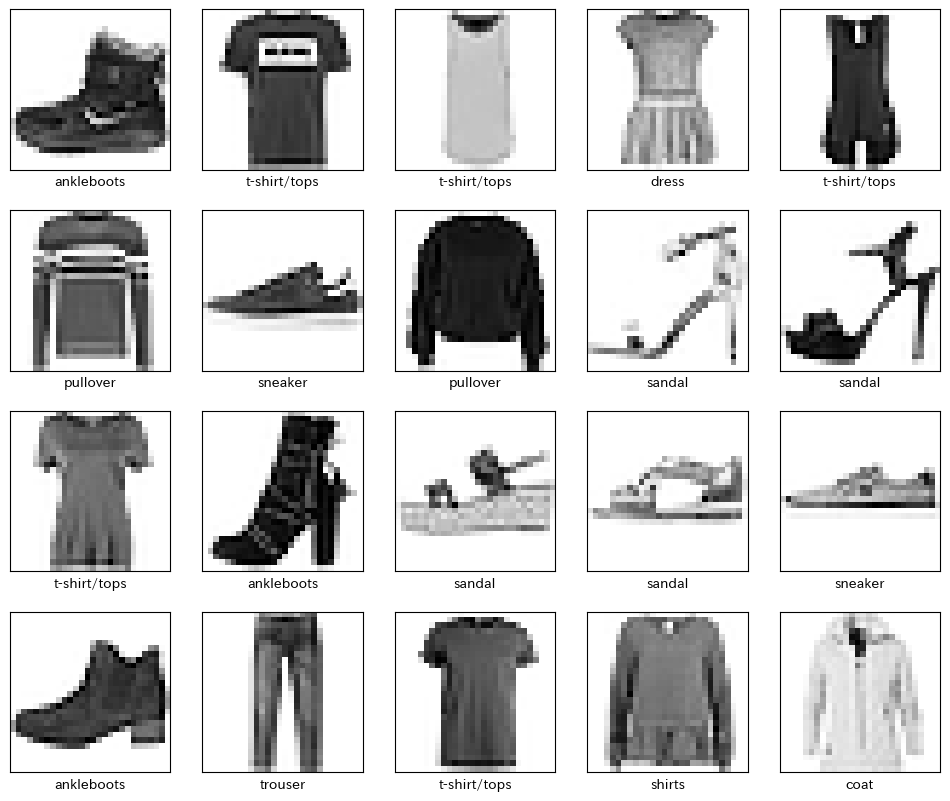

In [11]:
class_names = ["t-shirt/tops", "trouser", "pullover" , "dress", "coat",
               "sandal", "shirts","sneaker", "bag", "ankleboots"]

n_rows      = 4
n_columns   = 5
def display_data(x_data, y_data):
  plt.figure(figsize =(12,10))
  rows = n_rows
  columns  = n_columns
  for i in range(rows*columns):
    plt.subplot(rows, columns, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_data[i],cmap="Greys") #cmap="Greys"がないと、なぜか緑と黄色の画像になる笑
    plt.xlabel(class_names[y_data[i]])
  plt.show()
display_data(x_train, y_train)

In [15]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape = (28,28)))  # 28*28の画像データ（２次元配データを784個の1次元データに変換）　入力層
model.add(layers.Dense(128, activation="relu")   )  #128個の中間層
model.add(layers.Dense(10, activation="softmax")     ) #10個(0~9の数字)の出力層
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer="adam",                           #?What is Adam
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=15,    #最初は10-->５
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4926 - accuracy: 0.8271 - val_loss: 0.4287 - val_accuracy: 0.8464
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8649 - val_loss: 0.3836 - val_accuracy: 0.8610
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.8770 - val_loss: 0.3654 - val_accuracy: 0.8664
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3136 - accuracy: 0.8859 - val_loss: 0.3595 - val_accuracy: 0.8725
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2916 - accuracy: 0.8919 - val_loss: 0.3516 - val_accuracy: 0.8747
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8956 - val_loss: 0.3472 - val_accuracy: 0.8756
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2678 - accuracy: 0.9011 - val_loss: 0.3718 - val_accuracy:

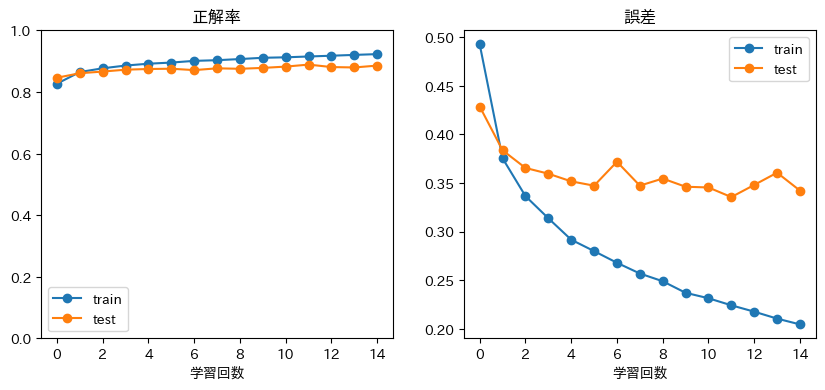

In [17]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

313/313 [==============================] - 1s 2ms/step


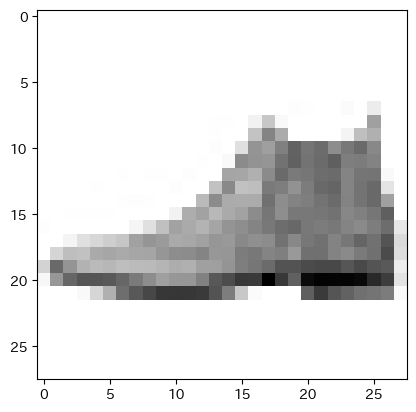

In [18]:
pre = model.predict(x_test)

i = 0
plt.imshow(x_test[i], cmap="Greys")
plt.show()

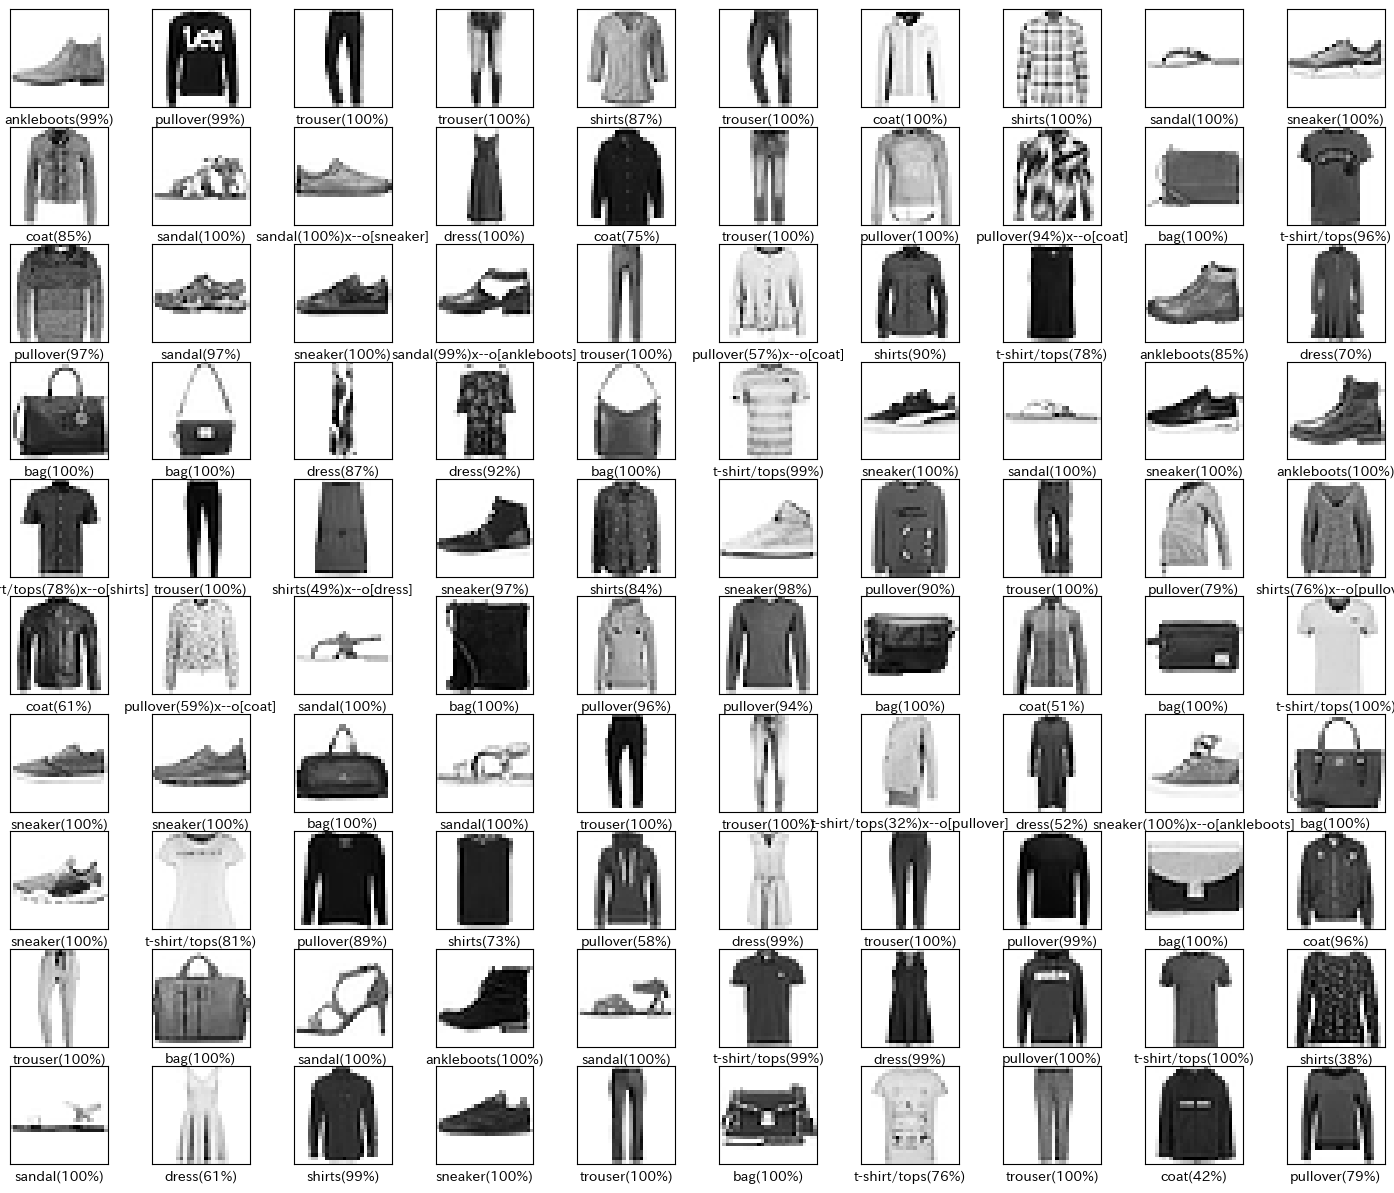

In [22]:
n_rows      =  10
n_columns   = 10
plt.figure(figsize=(18,15))
for i in range(n_rows*n_columns):
  plt.subplot(n_rows, n_columns, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap ="Greys")
  #
  index= np.argmax(pre[i])
  pct  = pre[i][index]
  ans  = ""
  if index != y_test[i]:
    ans = "x--o["+class_names[y_test[i]]+"]"
  lbl = f"{class_names[index]}({pct:.0%}){ans}"
  plt.xlabel(lbl)
plt.show()